In [17]:
import pandas as pd
import numpy as np

In [18]:
import nltk

In [19]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
df = pd.read_csv('Export-JRC-Data-Catalogue.xlsx - Data.csv')

In [21]:
from IPython.display import display
pd.options.display.max_columns = None

In [22]:
df.head()

,ID,Name,Website,Description,Intéret économique et public du projet (A>B>C),code annotateur,Geographical extent,Geographic coverage\nCountry,Geographic coverage \nNUTS 2021,Responsible\nOrganization,Responsible \nOrganization \nCategory,Functions of Government \n(COFOG level I),Functions of Government \n(COFOG level II),Status,Start Year,End Year,AI Classification (I),AI Classification \nSubdomain (II)\n(Main),AI Classification \nSubdomain (II)\n(Other I),AI Classification \nSubdomain (II)\n(Other II),AI Classification \nSubdomain (II)\n(Other III),AI Keywords (III),Process Type,Application Type,Technology,Interaction,Data Scope 1,Data Scope 2,Improved Public Service,Personalized Services,Public (citizen)-centered services,Increase quality of PSI and services,"More responsive, efficient, and cost-effective public services",New services or channels,Unnamed: 34,Improved Administrative Efficiency,Cost-reduction,Responsiveness of government operation,Improved management of public resources,Increased quality of processes and systems,Better collaboration and better communication,Reduced or eliminate the risk of corruption and abuse of the law by public servants,"Enabled greater fairness, honesty, equality",Open government capabilities,Increased transparency of public sector operations,Increased public participation in government actions and policy making,Improved public control and influence on government actions and policies,Source
0,1,AMS - public employment service,Algorithmic Profiling of Job Seekers in Austri...,"As of 2020, the Public Employment Service Aust...",NaN,1.0,National,Austria,AT,Public Employment Service Austria,Central-Government,Social protection,Unemployment.,Not in use anymore,2020,NaN,Learning,Machine learning,Knowledge representation,;,NaN,NaN,Public services and engagement,Service personalisation (various),Artificial Intelligence,G2C,Historical Data,Historical Data,Improved Public Service,NaN,NaN,x,x,NaN,Open Government Capabilities,FALSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Open government capabilities,NaN,NaN,x,(https://www.derstandard.at/story/200011948693...
1,2,Mona - Public chatbot for companies on the sub...,https://www.usp.gv.at/Portal.Node/usp/public,"The new chatbot ""Mona"" is intended to cover al...",NaN,2.0,National,Austria,AT,"Unternehmensservice Portal, Austria",Central-Government,General public services,"Executive and legislative organs, financial an...",Implemented,2020,NaN,Communication,Natural language processing,Machine learning,Searching,NaN,chatbot,Public services and engagement,Engagement management,Artificial Intelligence,G2C,Dynamic Data,Dynamic Data,Improved Public Service,NaN,x,x,x,NaN,FALSE,FALSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE,NaN,NaN,NaN,https://oecd-opsi.org/covid-response/infopoint...
2,3,CitizenLab - Youth for Climate,https://youth4climate.be/en/,Collecting input was just the easy part: in or...,NaN,3.0,National,Belgium,BE,"CitizenLab, Belgium",Private sector,Environmental protection,Environmental protection n.e.c.,Implemented,2019,NaN,Learning,Machine learning,Natural language processing,NaN,NaN,sentiment analysis,Public services and engagement,Engagement management,Artificial Intelligence,G2C,Historical Data,Location Data,Improved Public Service,NaN,x,NaN,x,NaN,Open Government Capabilities,FALSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Open government capabilities,x,x,x,https://www.citizenlab.co/blog/product-update/...
3,4,Walloon - Agricultural subsidy monitoring with...,https://inspire.ec.europa.eu/sites/default/fil...,Walloon uses geo AI with satellite imagery to ...,NaN,4.0,Regional,Belgium,BE2,Département de l'Agriculture,Local Government,Economic affairs,"Agriculture, forestry, fishing and hunting",Implemented,2020,NaN,Learning,Machine learning,Computer vision,Automated reasoning,NaN,NaN,"Analysis, monitoring and regulatory research",Monitoring policy implementation,Artificial Intelligence,G2B,Dynamic Data,Location Data,Improved Public Service,NaN,NaN,x,x,NaN,FALSE,FALSE,NaN,NaN,NaN,NaN,N

In [23]:
df['Geographic coverage \nNUTS 2021'].unique()

array(['AT', 'BE', 'BE2', 'BE21', 'BE100', 'BG', 'HR', 'CY', 'CZ', 'DK',
       'EE', 'FI', 'FR', 'PL', 'DE', 'IE', 'IT', 'LT', 'NL', 'NL329',
       'ES', 'NO', 'PT', 'RO', 'RO415', 'RO11', 'SK', 'SI', 'UK', 'SE',
       'CH', 'ES511', 'EL', 'HU', 'LU', 'SI042', 'DK03', 'DK031', 'DK02',
       'DK050', 'DK032', 'DK042', 'DK01', 'DK011', 'BE211', 'BE242',
       'FI1B', 'FRI', 'ITH20', 'ES2', 'CH01', 'ITC4C', 'UA', 'MD', 'LV',
       'HR021', 'ITI43', 'ITC11', 'BE22'], dtype=object)

In [31]:
df['Status'].unique()

array(['Not in use anymore', 'Implemented', 'In development', 'Pilot',
       'Planned'], dtype=object)

In [81]:
import pandas as pd

# Assuming your DataFrame is named 'df' and contains a column named 'status'
# To drop rows containing 'Planned' in the 'status' column
df = df[df['Status'] != 'Planned']

# Count the number of rows eliminated
rows_eliminated = len(df[df['Status'] == 'Planned'])

print("Number of rows eliminated:", rows_eliminated)

Number of rows eliminated: 0


In [90]:
df[df['Status'] == 'Planned']

,Name,Website,Description,Geographic coverage\nCountry,Responsible\nOrganization,Responsible \nOrganization \nCategory,Functions of Government \n(COFOG level I),Functions of Government \n(COFOG level II),Status,Start Year,End Year,AI Classification (I),AI Classification \nSubdomain (II)\n(Main),AI Classification \nSubdomain (II)\n(Other I),Process Type,Application Type,Technology,Interaction,Data Scope 1,Data Scope 2,Improved Public Service,Increase quality of PSI and services,"More responsive, efficient, and cost-effective public services",Unnamed: 34,Improved Administrative Efficiency,Cost-reduction,Responsiveness of government operation,Improved management of public resources,Increased quality of processes and systems,Open government capabilities,DescriptionN,IA_count


In [32]:
df.shape

(686, 48)

# Percentage of Missing Values 

In [8]:
df.isnull().sum()

ID                                                                                       0
Name                                                                                     0
Website                                                                                 37
Description                                                                              0
Intéret économique et public du projet (A>B>C)                                         686
code annotateur                                                                         86
Geographical extent                                                                      0
Geographic coverage\nCountry                                                             0
Geographic coverage \nNUTS 2021                                                          0
Responsible\nOrganization                                                               23
Responsible \nOrganization \nCategory                                                    0

In [33]:
# Assuming your DataFrame is named 'df'
total_rows = len(df)
missing_values = df.isnull().sum()
percentage_missing = (missing_values / total_rows) * 100

print("Percentage of missing values in each column:")
print(percentage_missing)

Percentage of missing values in each column:
ID                                                                                       0.000000
Name                                                                                     0.000000
Website                                                                                  5.393586
Description                                                                              0.000000
Intéret économique et public du projet (A>B>C)                                         100.000000
code annotateur                                                                         12.536443
Geographical extent                                                                      0.000000
Geographic coverage\nCountry                                                             0.000000
Geographic coverage \nNUTS 2021                                                          0.000000
Responsible\nOrganization                                                

In [24]:
df.drop(['AI Classification \nSubdomain (II)\n(Other II)','AI Classification \nSubdomain (II)\n(Other III)', 'AI Keywords (III)'
        ,'Personalized Services','Public (citizen)-centered services','New services or channels','Better collaboration and better communication',
        'Reduced or eliminate the risk of corruption and abuse of the law by public servants','Enabled greater fairness, honesty, equality'
        ,'Increased public participation in government actions and policy making','Increased transparency of public sector operations',
        'Increased public participation in government actions and policy making','Improved public control and influence on government actions and policies'], axis=1, inplace=True)

In [25]:
df.drop(['ID','code annotateur','Intéret économique et public du projet (A>B>C)'], axis=1, inplace=True)

In [26]:
import pandas as pd

# Assuming your DataFrame is named 'df'
categorical_columns = []
numerical_columns = []

for column in df.columns:
    if df[column].dtype == 'object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

print("Categorical columns:")
print(categorical_columns)

print("Numerical columns:")
print(numerical_columns)


Categorical columns:
['Name', 'Website', 'Description', 'Geographical extent', 'Geographic coverage\nCountry', 'Geographic coverage \nNUTS 2021', 'Responsible\nOrganization', 'Responsible \nOrganization \nCategory', 'Functions of Government \n(COFOG level I)', 'Functions of Government \n(COFOG level II)', 'Status', 'AI Classification (I)', 'AI Classification \nSubdomain (II)\n(Main)', 'AI Classification \nSubdomain (II)\n(Other I)', 'Process Type', 'Application Type', 'Technology', 'Interaction', 'Data Scope 1', 'Data Scope 2', 'Improved Public Service', 'Increase quality of PSI and services', 'More responsive, efficient, and cost-effective public services', 'Unnamed: 34', 'Improved Administrative Efficiency', 'Cost-reduction', 'Responsiveness of government operation', 'Improved management of public resources', 'Increased quality of processes and systems', 'Open government capabilities', 'Source']
Numerical columns:
['Start Year', 'End Year']


In [47]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming your DataFrame is named 'df' and contains the categorical variables
categorical_columns = ['Name', 'Website', 'Description', 'Geographical extent', 'Geographic coverage\nCountry',
                       'Geographic coverage \nNUTS 2021', 'Responsible\nOrganization',
                       'Responsible \nOrganization \nCategory', 'Functions of Government \n(COFOG level I)',
                       'Functions of Government \n(COFOG level II)', 'Status', 'AI Classification (I)',
                       'AI Classification \nSubdomain (II)\n(Main)', 'AI Classification \nSubdomain (II)\n(Other I)',
                       'Process Type', 'Application Type', 'Technology', 'Interaction', 'Data Scope 1', 'Data Scope 2',
                       'Improved Public Service', 'Increase quality of PSI and services',
                       'More responsive, efficient, and cost-effective public services', 'Unnamed: 34',
                       'Improved Administrative Efficiency', 'Cost-reduction', 'Responsiveness of government operation',
                       'Improved management of public resources', 'Increased quality of processes and systems',
                       'Open government capabilities', 'Source']

for column in categorical_columns:
    contingency_table = pd.crosstab(df[column], df['Geographical extent'])  # Assuming 'Target Variable' is the dependent variable
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    
    print(f"Column: {column}")
    print(f"Chi-squared statistic: {chi2}")
    print(f"P-value: {p_value}")
    print()


Column: Name
Chi-squared statistic: 2058.0
P-value: 0.4772047947616792

Column: Website
Chi-squared statistic: 1597.5837099087535
P-value: 1.0498201009572684e-07

Column: Description
Chi-squared statistic: 2058.0
P-value: 0.4034167468156071

Column: Geographical extent
Chi-squared statistic: 2058.0
P-value: 0.0

Column: Geographic coverage
Country
Chi-squared statistic: 372.4684606033936
P-value: 5.565484211135894e-37

Column: Geographic coverage 
NUTS 2021
Chi-squared statistic: 514.6571002782405
P-value: 2.1712219903864778e-35

Column: Responsible
Organization
Chi-squared statistic: 1948.7946803051605
P-value: 8.936431181291972e-07

Column: Responsible 
Organization 
Category
Chi-squared statistic: 1084.5163333629002
P-value: 2.6825838447563818e-216

Column: Functions of Government 
(COFOG level I)
Chi-squared statistic: 40.062506593896956
P-value: 0.05055108852424075

Column: Functions of Government 
(COFOG level II)
Chi-squared statistic: 242.88096762057842
P-value: 4.8954665886656

In [150]:
df.drop(['Geographic coverage \nNUTS 2021','Geographical extent','Source'], axis=1, inplace=True)

In [55]:
df.shape

(686, 30)

In [110]:
df.head()

,Name,Website,Description,Geographic coverage\nCountry,Responsible\nOrganization,Responsible \nOrganization \nCategory,Functions of Government \n(COFOG level I),Functions of Government \n(COFOG level II),Status,Start Year,End Year,AI Classification (I),AI Classification \nSubdomain (II)\n(Main),AI Classification \nSubdomain (II)\n(Other I),Process Type,Application Type,Technology,Interaction,Data Scope 1,Data Scope 2,Improved Public Service,Increase quality of PSI and services,"More responsive, efficient, and cost-effective public services",Unnamed: 34,Improved Administrative Efficiency,Cost-reduction,Responsiveness of government operation,Improved management of public resources,Increased quality of processes and systems,Open government capabilities,DescriptionN,IA_count
0,AMS - public employment service,Algorithmic Profiling of Job Seekers in Austri...,"As of 2020, the Public Employment Service Aust...",Austria,Public Employment Service Austria,Central-Government,Social protection,Unemployment.,Not in use anymore,2020,NaN,Learning,Machine learning,Knowledge representation,Public services and engagement,Service personalisation (various),Artificial Intelligence,G2C,Historical Data,Historical Data,False,x,x,Open Government Capabilities,False,NaN,NaN,NaN,NaN,True,"AMS - public employment service As of 2020, th...",0
1,Mona - Public chatbot for companies on the sub...,https://www.usp.gv.at/Portal.Node/usp/public,"The new chatbot ""Mona"" is intended to cover al...",Austria,"Unternehmensservice Portal, Austria",Central-Government,General public services,"Executive and legislative organs, financial an...",Implemented,2020,NaN,Communication,Natural language processing,Machine learning,Public services and engagement,Engagement management,Artificial Intelligence,G2C,Dynamic Data,Dynamic Data,False,x,x,FALSE,False,NaN,NaN,NaN,NaN,False,Mona - Public chatbot for companies on the sub...,0
2,CitizenLab - Youth for Climate,https://youth4climate.be/en/,Collecting input was just the easy part: in or...,Belgium,"CitizenLab, Belgium",Private sector,Environmental protection,Environmental protection n.e.c.,Implemented,2019,NaN,Learning,Machine learning,Natural language processing,Public services and engagement,Engagement management,Artificial Intelligence,G2C,Historical Data,Location Data,False,NaN,x,Open Government Capabilities,False,NaN,NaN,NaN,NaN,True,CitizenLab - Youth for Climate Collecting inpu...,0
3,Walloon - Agricultural subsidy monitoring with...,https://inspire.ec.europa.eu/sites/default/fil...,Walloon uses geo AI with satellite imagery to ...,Belgium,Département de l'Agriculture,Local Government,Economic affairs,"Agriculture, forestry, fishing and hunting",Implemented,2020,NaN,Learning,Machine learning,Computer vision,"Analysis, monitoring and regulatory research",Monitoring policy implementation,Artificial Intelligence,G2B,Dynamic Data,Location Data,False,x,x,FALSE,False,NaN,NaN,NaN,NaN,False,Walloon - Agricultural subsidy monitoring with...,0
4,AcPaas - Technical procurement documents compa...,https://acpaas.digipolis.be/nl/home,The city of Antwerp has a platform called Antw...,Belgium,Digipolis & city of Antwerp,Private sector,General public services,General public services n.e.c.,Implemented,2020,NaN,Reasoning,Automated reasoning,Machine learning,Internal management,Internal support processes,Artificial Intelligence,G2C,Dynamic Data,Dynamic Data,False,x,x,FALSE,False,NaN,NaN,NaN,NaN,False,AcPaas - Technical procurement documents compa...,0


In [27]:
# Fusionner les colonnes "Name" et "Description" dans une colonne "Combined"
df["DescriptionN"] = df["Name"] + " " + df["Description"]

In [28]:
print('Improved Public Service:\t',df['Improved Public Service'].unique())
print('Improved Administrative Efficiency:\t',df['Improved Administrative Efficiency'].unique())
print('Open government capabilities:\t',df['Open government capabilities'].unique())

Improved Public Service:	 ['Improved Public Service' 'FALSE']
Improved Administrative Efficiency:	 ['FALSE' 'Improved Administrative Efficiency']
Open government capabilities:	 ['Open government capabilities' 'FALSE']


In [29]:
import pandas as pd

# Assuming df is your DataFrame
df['Improved Public Service'] = df['Improved Public Service'].map(lambda x: True if x == 'Improved Public Service' else False)
# Assuming df is your DataFrame
df['Improved Administrative Efficiency'] = df['Improved Administrative Efficiency'].map(lambda x: True if x == 'Improved Administrative Efficiency' else False)
# Assuming df is your DataFrame
df['Open government capabilities'] = df['Open government capabilities'].map(lambda x: True if x == 'Open government capabilities' else False)

In [30]:
import pandas as pd
import nltk

# Download the required NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


# Function to count the occurrences of specific words in a text
def count_words(text):
    tokens = nltk.word_tokenize(str(text))
    word_counts = {}
    additional_words = ['IA', 'artificielle', 'machine', 'learning', 'intelligence']
    for word in tokens:
        if word in additional_words:
            if word in word_counts:
                word_counts[word] += 1
            else:
                word_counts[word] = 1
    return word_counts

# Apply the function to the 'DescriptionN' column
df['DescriptionN'] = df['DescriptionN'].apply(count_ia)

# Group by 'Geographic coverage\nCountry' and count the rows
result = df.groupby('Geographic coverage\nCountry').size().reset_index(name='Count')

print(result)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


NameError: name 'count_ia' is not defined

# Classification

In [73]:
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')  # Télécharger les données nécessaires pour tokenizer le texte

# Tokenization des phrases dans la colonne "DescriptionN" (nom + description)
sentences = [nltk.word_tokenize(text) for text in df["DescriptionN"]]

# Entraîner le modèle Word2Vec
model = Word2Vec(sentences, min_count=1)  # Spécifiez les paramètres appropriés selon vos besoins

# Obtenir le vecteur moyen pour chaque phrase
vectors = []
for sentence in sentences:
    vector = sum(model.wv[word] for word in sentence) / len(sentence)
    vectors.append(vector)

# Ajouter les vecteurs au dataframe
df["Vectorized"] = vectors

# Afficher le dataframe avec les vecteurs
print(df["Vectorized"])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0      [-0.32890108, 0.7766266, 0.2938831, 0.15918764...
1      [-0.36318508, 0.8531113, 0.32270157, 0.1739175...
2      [-0.33817244, 0.7911335, 0.29801968, 0.1614528...
3      [-0.27872857, 0.66429645, 0.2512359, 0.1317332...
4      [-0.36386204, 0.8547696, 0.32387897, 0.1758910...
                             ...                        
681    [-0.2756258, 0.64499414, 0.24404743, 0.1274121...
682    [-0.27314857, 0.646685, 0.2419381, 0.1303397, ...
683    [-0.29905346, 0.7040899, 0.27045077, 0.1424406...
684    [-0.32813162, 0.7702681, 0.29090577, 0.1552779...
685    [-0.35329524, 0.8326515, 0.3118701, 0.1704763,...
Name: Vectorized, Length: 686, dtype: object


In [27]:
model.save('model.bin')

In [28]:
new_model=Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=9261, vector_size=100, alpha=0.025)


In [31]:
from gensim.models import Word2Vec
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')  # Télécharger les données nécessaires pour tokenizer le texte
nltk.download('stopwords')  # Télécharger les stopwords
nltk.download('wordnet')  # Télécharger WordNet lemmatizer data
nltk.download('omw-1.4')

# Tokenization des phrases dans la colonne "DescriptionN" (nom + description)
sentences = [nltk.word_tokenize(text) for text in df["DescriptionN"]]

# Supprimer les stopwords des phrases
stop_words = set(stopwords.words('english'))  # Utilisez la langue appropriée pour les stopwords
filtered_sentences = [[word for word in sentence if word.lower() not in stop_words] for sentence in sentences]

# Supprimer la ponctuation des phrases
translator = str.maketrans("", "", string.punctuation)
filtered_sentences = [[word.translate(translator) for word in sentence] for sentence in filtered_sentences]

# Lemmatization des mots
lemmatizer = WordNetLemmatizer()
filtered_sentences = [[lemmatizer.lemmatize(word.lower()) for word in sentence] for sentence in filtered_sentences]

# Entraîner le modèle Word2Vec
model = Word2Vec(filtered_sentences, min_count=1, window=80, vector_size=90)  # Spécifiez les paramètres appropriés selon vos besoins

# Obtenir le vecteur moyen pour chaque phrase
vectors = []
for sentence in filtered_sentences:
    vector = sum(model.wv[word] for word in sentence) / len(sentence)
    vectors.append(vector)

# Ajouter les vecteurs au dataframe
df["Vectorized"] = vectors

# Afficher le dataframe avec les vecteurs
print(df["Vectorized"])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0      [0.06302026, -0.06661201, -0.26183304, 0.16494...
1      [0.06511663, -0.07859234, -0.2783611, 0.178509...
2      [0.06104896, -0.062274184, -0.2451122, 0.15613...
3      [0.049293786, -0.0440052, -0.1842708, 0.114495...
4      [0.06746403, -0.0756286, -0.2871593, 0.1830066...
                             ...                        
681    [0.061978955, -0.10618329, -0.31588948, 0.2048...
682    [0.070073366, -0.07204592, -0.28866658, 0.1855...
683    [0.054204553, -0.07445232, -0.23381779, 0.1517...
684    [0.06488741, -0.061024413, -0.2569229, 0.16529...
685    [0.058684777, -0.06263344, -0.24007678, 0.1555...
Name: Vectorized, Length: 686, dtype: object


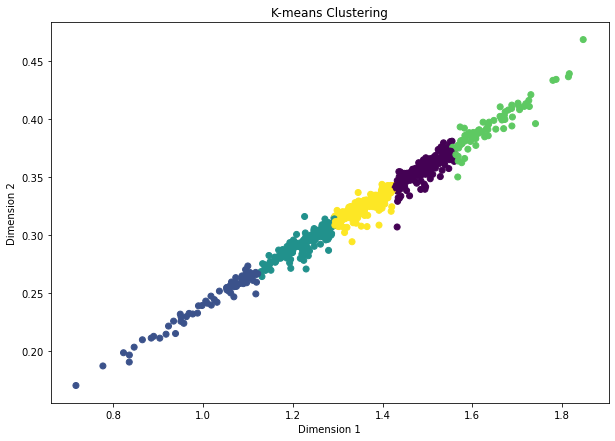

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Convert the vectorized sentences to a numpy array
vectors = np.array(df["Vectorized"].tolist())

# Apply K-means clustering
num_clusters = 5  # Specify the number of clusters
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(vectors)

# Visualize the clusters
plt.figure(figsize=(10, 7))
plt.scatter(vectors[:, 0], vectors[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


In [32]:
from gensim.models import Word2Vec
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')  # Télécharger les données nécessaires pour tokenizer le texte
nltk.download('stopwords')  # Télécharger les stopwords
nltk.download('wordnet')  # Télécharger WordNet lemmatizer data
nltk.download('averaged_perceptron_tagger')  # Télécharger le tagger

# Tokenization des phrases dans la colonne "DescriptionN" (nom + description)
sentences = [nltk.word_tokenize(text) for text in df["DescriptionN"]]

# Supprimer les stopwords des phrases
stop_words = set(stopwords.words('english'))  # Utilisez la langue appropriée pour les stopwords
filtered_sentences = [[word for word in sentence if word.lower() not in stop_words] for sentence in sentences]

# Supprimer la ponctuation des phrases
translator = str.maketrans("", "", string.punctuation)
filtered_sentences = [[word.translate(translator) for word in sentence] for sentence in filtered_sentences]

# Part-of-speech tagging
tagged_sentences = [nltk.pos_tag(sentence) for sentence in filtered_sentences]

# Mapping POS tags to WordNet POS tags
tag_map = {
    'N': 'n',  # Noun
    'V': 'v',  # Verb
    'R': 'r',  # Adverb
    'J': 'a'   # Adjective
}

# Lemmatization des mots en utilisant les tags POS
lemmatizer = WordNetLemmatizer()
lemmatized_sentences = [[lemmatizer.lemmatize(word.lower(), tag_map.get(tag[0], 'n')) for word, tag in sentence] for sentence in tagged_sentences]

# Entraîner le modèle Word2Vec
model = Word2Vec(lemmatized_sentences, min_count=1, window=80, vector_size=90)  # Spécifiez les paramètres appropriés selon vos besoins

# Obtenir le vecteur moyen pour chaque phrase
vectors = []
for sentence in lemmatized_sentences:
    vector = sum(model.wv[word] for word in sentence) / len(sentence)
    vectors.append(vector)

# Ajouter les vecteurs au dataframe
df["Vectorized"] = vectors

# Afficher le dataframe avec les vecteurs
print(df["Vectorized"])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


0      [1.3149524, 0.315712, -0.6140645, 0.73002505, ...
1      [1.4346125, 0.33450505, -0.66727424, 0.7969365...
2      [1.2817854, 0.3100446, -0.5954799, 0.71635467,...
3      [0.99604374, 0.24154094, -0.46218315, 0.548766...
4      [1.4966824, 0.35651606, -0.69236726, 0.8374655...
                             ...                        
681    [1.5599495, 0.350166, -0.7230853, 0.869827, 0....
682    [1.4111156, 0.33993435, -0.6534689, 0.7856321,...
683    [1.2308099, 0.28280956, -0.57367456, 0.684434,...
684    [1.332526, 0.32386568, -0.61924154, 0.7427471,...
685    [1.220014, 0.2922293, -0.5683534, 0.6771164, 0...
Name: Vectorized, Length: 686, dtype: object


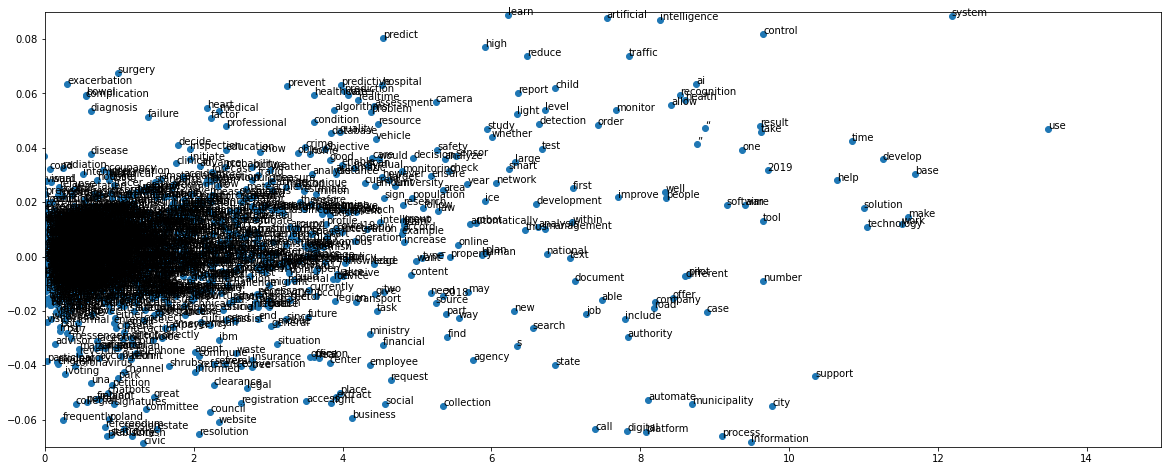

In [34]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X = model.wv[model.wv.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Resize the plot
plt.figure(figsize=(20, 8))  # Set the width and height of the figure

plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
# Adjust the axis limits
plt.xlim(0, 15)
plt.ylim(-0.07, 0.09)


plt.show()


# Word2Vec and PCA

In [134]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import nltk
import pandas as pd
import string
from nltk.corpus import stopwords

nltk.download('punkt')  # Download the necessary data for text tokenization
nltk.download('stopwords')  # Download the stopwords

# Tokenization of sentences in the "DescriptionN" column (name + description)
sentences = [nltk.word_tokenize(text) for text in df["DescriptionN"]]

# Stopwords and punctuation removal
stop_words = set(stopwords.words('english'))  # Use the appropriate language for stopwords
translator = str.maketrans("", "", string.punctuation)
filtered_sentences = [[word.translate(translator) for word in sentence if word.lower() not in stop_words] for sentence in sentences]

# Train the Word2Vec model
model = Word2Vec(filtered_sentences, min_count=1, vector_size=90, window=80)  # Specify the appropriate parameters according to your needs

# Get the average vector for each sentence
vectors = []
for sentence in filtered_sentences:
    vector = sum(model.wv[word] for word in sentence) / len(sentence)
    vectors.append(vector)

# Convert the vectors to a pandas DataFrame
df_vectors = pd.DataFrame(vectors)

# Apply PCA to reduce the dimensionality to 5
pca = PCA(n_components=5)
pca_vectors = pca.fit_transform(df_vectors)

# Add the PCA vectors to the DataFrame
df["PCA1"] = pca_vectors[:, 0]
df["PCA2"] = pca_vectors[:, 1]
df["PCA3"] = pca_vectors[:, 2]
df["PCA4"] = pca_vectors[:, 3]
df["PCA5"] = pca_vectors[:, 4]

# Display the DataFrame with the PCA vectors
print(df[["PCA1", "PCA2", "PCA3", "PCA4", "PCA5"]])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


         PCA1      PCA2      PCA3      PCA4      PCA5
0    0.129244 -0.000474  0.000056 -0.002827 -0.003203
1   -0.581984 -0.018275  0.002295  0.001909 -0.001942
2    0.356476  0.000305  0.000110 -0.000342 -0.000968
3    2.221390  0.005952 -0.001106 -0.001213  0.001022
4   -1.285711 -0.007408 -0.000466  0.001701  0.002173
..        ...       ...       ...       ...       ...
681  0.256883 -0.042072  0.018741  0.004247  0.000802
682 -0.477221 -0.001423 -0.005319  0.004635  0.000596
683 -0.074383 -0.023627 -0.001161  0.006186 -0.001107
684  0.336210  0.004852 -0.000464 -0.001718  0.003753
685  0.969825 -0.000891 -0.000380  0.001333 -0.001586

[686 rows x 5 columns]


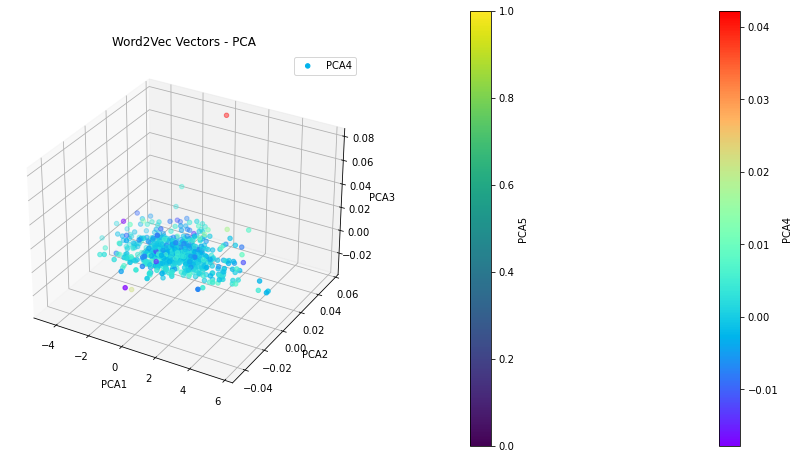

In [135]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Create a larger figure
fig = plt.figure(figsize=(15, 8))  # Adjust the width and height as desired

# Add a subplot for the 3D scatter plot
ax = fig.add_subplot(111, projection='3d')

# Plot the data points using the first three PCA components
scatter = ax.scatter(df["PCA1"], df["PCA2"], df["PCA3"], c=df["PCA4"], cmap='rainbow', label='PCA4')

# Set labels and title
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('Word2Vec Vectors - PCA')

# Add colorbar for PCA4 with increased spacing (pad)
cbar = fig.colorbar(scatter, pad=0.2)  
cbar.set_label('PCA4')

# Add second colorbar for PCA5 with increased spacing (pad)
cbar2 = fig.colorbar(cm.ScalarMappable(cmap='viridis'), pad=0.2)  
cbar2.set_label('PCA5')

# Add legend
ax.legend()

# Show the plot
plt.show()


In [36]:
pip install transformers

     ---------------------------------------- 7.1/7.1 MB 1.0 MB/s eta 0:00:00
     ------------------------------------ 236.8/236.8 kB 906.4 kB/s eta 0:00:00
     ---------------------------------------- 3.5/3.5 MB 1.1 MB/s eta 0:00:00



# Data Viz - Maps

In [72]:
pip install altair

     -------------------------------------- 471.5/471.5 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [124]:
pip install geopy

     -------------------------------------- 119.8/119.8 kB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 40.3/40.3 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim

# Create a map centered at a specific location
map_center = [50, 10]  # Set the center coordinates of the map (e.g., Europe)
zoom_level = 4  # Set the initial zoom level of the map
map_obj = folium.Map(location=map_center, zoom_start=zoom_level)

# Create a list of European countries
european_countries = ['France', 'Germany', 'Italy', 'Spain','Austria','Belgium']  # Add more countries as needed

# Create a geocoder instance
geolocator = Nominatim(user_agent='my_geocoder')

# Create a function to assign color based on group
def assign_color(group):
    if group == 1:
        return 'green'  # Group 1 color
    elif group == 2:
        return 'yellow'  # Group 2 color
    else:
        return 'red'  # Group 3 color

# Iterate over the European countries and add markers to the map
for country in european_countries:
    # Get the latitude and longitude coordinates of the country
    location = geolocator.geocode(country)
    lat, lon = location.latitude, location.longitude
    
    # Assign a group based on the country
    # You can define your own logic here based on your requirements
    if country == 'France':
        group = 1
    elif country == 'Germany':
        group = 2
    else:
        group = 3
    
    # Get the color based on the group
    color = assign_color(group)
    
    # Add the country boundary using GeoJSON
    folium.GeoJson(
        'map.geojson',  # Replace with the actual file name of the GeoJSON file
        style_function=lambda feature: {
            'fillColor': color if map_obj.zoom >= 10 else 'white',
            'fillOpacity': 0.5 if map_obj.zoom >= 10 else 0.2
        }
    ).add_to(map_obj)
    
    # Add a marker for each country with the assigned color
    folium.Marker(location=[lat, lon], popup=country, icon=folium.Icon(color=color)).add_to(map_obj)

# Display the map      
map_obj


C:\Users\MSI\AppData\Local\Temp\ipykernel_11732\3724887907.py:53: UserWarning: color argument of Icon should be one of: {'darkpurple', 'cadetblue', 'lightred', 'orange', 'gray', 'green', 'lightblue', 'purple', 'white', 'darkgreen', 'red', 'lightgray', 'pink', 'darkred', 'lightgreen', 'blue', 'black', 'beige', 'darkblue'}.
  folium.Marker(location=[lat, lon], popup=country, icon=folium.Icon(color=color)).add_to(map_obj)


In [17]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap

# Create a map centered at a specific location
map_center = [50, 10]  # Set the center coordinates of the map (e.g., Europe)
zoom_level = 4  # Set the initial zoom level of the map
map_obj = folium.Map(location=map_center, zoom_start=zoom_level)

# Create a list of European countries
european_countries = ['France', 'Germany', 'Italy', 'Spain']  # Add more countries as needed

#european_countries = df['Geographic coverage\nCountry']

# Create a geocoder instance
geolocator = Nominatim(user_agent='my_geocoder')

# Create a function to assign color based on group
def assign_color(group):
    if group == 1:
        return 'green'  # Group 1 color
    elif group == 2:
        return 'yellow'  # Group 2 color
    else:
        return 'red'  # Group 3 color

# Iterate over the European countries and add markers to the map
for country in european_countries:
    # Get the latitude and longitude coordinates of the country
    location = geolocator.geocode(country)
    if location is None:
        continue  # Skip countries with no valid geocoding result
    lat, lon = location.latitude, location.longitude
    
    # Assign a group based on the country
    # You can define your own logic here based on your requirements
    if country == 'France':
        group = 1
    elif country == 'Germany':
        group = 2
    else:
        group = 3
    
    # Get the color based on the group
    color = assign_color(group)
    
    # Add the country boundary using GeoJSON
    folium.GeoJson(
        'map.geojson',  # Replace with the actual file name of the GeoJSON file
        style_function=lambda feature: {
            'fillColor': color if map_obj.zoom >= 10 else 'white',
            'fillOpacity': 0.5 if map_obj.zoom >= 10 else 0.2
        }
    ).add_to(map_obj)
    
    # Add a marker for each country with the assigned color
    folium.Marker(location=[lat, lon], popup=country, icon=folium.Icon(color=color)).add_to(map_obj)

# Generate random heatmap data
heatmap_data = []
for country in european_countries:
    location = geolocator.geocode(country)
    if location is not None:
        heatmap_data.append([location.latitude, location.longitude])

# Add heatmap layer to the map
HeatMap(heatmap_data).add_to(map_obj)

# Display the map      
map_obj


C:\Users\MSI\AppData\Local\Temp\ipykernel_11732\4087219244.py:58: UserWarning: color argument of Icon should be one of: {'darkpurple', 'cadetblue', 'lightred', 'orange', 'gray', 'green', 'lightblue', 'purple', 'white', 'darkgreen', 'red', 'lightgray', 'pink', 'darkred', 'lightgreen', 'blue', 'black', 'beige', 'darkblue'}.
  folium.Marker(location=[lat, lon], popup=country, icon=folium.Icon(color=color)).add_to(map_obj)


In [168]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap
import numpy as np

# Create a map centered at a specific location
map_center = [51.9, 10.4]  # Set the center coordinates of the map (e.g., Europe)
zoom_level = 4  # Set the initial zoom level of the map
map_obj = folium.Map(location=map_center, zoom_start=zoom_level)

# Create a list of European countries
european_countries = ['France', 'Germany', 'Italy', 'Spain', 'Netherlands', 'Portugal', 'Estonia', 'Belgium', 'Finland', 'Poland']  # Add more countries as needed

# Create a geocoder instance
geolocator = Nominatim(user_agent='my_geocoder')

# Create a function to assign color based on percentage
def assign_color(percentage):
    if percentage >= 0.5:
        return '#00C9A7'  # Green color for percentage >= 0.5
    elif percentage >= 0.3:
        return '#845EC2'  # Yellow color for percentage >= 0.3
    else:
        return '#F3C5FF'  # Red color for smaller percentages

# Generate random data for each variable and country
variables = ['Variable 1', 'Variable 2', 'Variable 3', 'Variable 4', 'Variable 5', 'Variable 6', 'Variable 7', 'Variable 8', 'Variable 9', 'Variable 10']  # Add more variables as needed

data = {
    'Country': european_countries
}

for variable in variables:
    data[variable] = np.random.rand(len(european_countries))

df = pd.DataFrame(data)

# Iterate over the European countries and add heatmaps to the map
for country in european_countries:
    # Get the latitude and longitude coordinates of the country
    location = geolocator.geocode(country)
    if location is None:
        continue  # Skip countries with no valid geocoding result
    lat, lon = location.latitude, location.longitude
    
    # Create a list to store heatmap data for each variable in the country
    heatmap_data = []

    # Iterate over the variables and add heatmap data
    for variable in variables:
        percentage = df.loc[df['Country'] == country, variable].values[0]
        offset = 0.2 if zoom_level == 4 else variables.index(variable) * 0.1  # Adjust the offset values as needed
        heatmap_data.append([lat + offset, lon + offset, percentage])
    
    # Iterate over the heatmap data and add heatmaps to the map
    for data_point in sorted(heatmap_data, key=lambda x: x[2], reverse=True):
        percentage = data_point[2]
        if percentage > 0:
            radius = percentage * 50  # Adjust the scaling factor as needed
            color = assign_color(percentage)
            folium.CircleMarker(location=[data_point[0], data_point[1]], radius=radius, color=color, fill_color=color, fill_opacity=0.7, fill=True, stroke=False).add_to(map_obj)

# Read the GeoJSON data for the countries
geo_data = 'map.geojson'  # Replace with the actual file name of the GeoJSON file
country_data = pd.DataFrame({
    'Country': european_countries,
    'Group': [1, 2, 3, 3, 1, 2, 3, 1, 2, 3]  # Modify the values based on your group assignments
})

# Create the Choropleth layer
folium.Choropleth(
    geo_data=geo_data,
    name='choropleth',
    data=country_data,
    columns=['Country', 'Group'],
    key_on='feature.properties.name',
    fill_color='YlGn',  # Modify the color scheme as desired
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Group'
).add_to(map_obj)

# Add a layer control to the map
folium.LayerControl().add_to(map_obj)

# Display the map
map_obj


In [186]:
df_before_2020 = pd.read_csv("df_before_2020.csv")

In [189]:
df_before_2020.head()

,Country,Service,Percentage
0,Belgium,Improved Public Service,50.000000
1,Belgium,Open government capabilities,40.000000
2,Belgium,Improved Administrative Efficiency,50.000000
3,Czech Republic,Improved Public Service,100.000000
4,Denmark,Improved Administrative Efficiency,63.636364


# Résultats avant 2020

In [12]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap

# Create a map centered at a specific location
map_center = [51.9, 10.4]  # Set the center coordinates of the map (e.g., Europe)
zoom_level = 4  # Set the initial zoom level of the map
map_obj = folium.Map(location=map_center, zoom_start=zoom_level)

# Create a geocoder instance
geolocator = Nominatim(user_agent='my_geocoder')

# Create a function to assign color based on percentage
def assign_color(percentage):
    if percentage >= 0.5:
        return '#00C9A7'  # percentage >= 0.5
    elif percentage >= 0.3:
        return '#845EC2'  #  percentage >= 0.3
    else:
        return '#F3C5FF'  # smaller percentages

# Create your DataFrame with Country, Service, and Percentage columns
data = {
    'Country': ['Netherlands', 'Netherlands', 'Netherlands', 'Spain', 'Spain', 'Spain', 'Italy', 'Italy', 'Italy', 'Italy', 'United Kingdom', 'United Kingdom','Poland','Poland'],
    'Service': ['Improved Public Service', 'Open government capabilities', 'Improved Administrative Efficiency', 'Improved Public Service', 'Improved Administrative Efficiency', 'Another Service', 'Improved Public Service', 'Another Service', 'Another Service', 'Another Service', 'Improved Public Service', 'Another Service','Improved Public Service','Another Service'],
    'Percentage': [0.41, 0.59, 0.22, 0.47, 0.53, 0.17, 0.55, 0.46, 0.04, 0.55, 0.45, 0.75,0.25,0.42]
}

df = pd.DataFrame(data)

# Iterate over the DataFrame rows and add circle markers to the map
for index, row in df.iterrows():
    country = row['Country']
    service = row['Service']
    percentage = row['Percentage']
    
    # Get the latitude and longitude coordinates of the country
    location = geolocator.geocode(country)
    if location is None:
        continue  # Skip countries with no valid geocoding result
    lat, lon = location.latitude, location.longitude
    
    # Calculate the offset based on the index
    offset = 0.2 if zoom_level == 4 else index * 0.1  # Adjust the offset values as needed
    
    # Add a circle marker to the map
    radius = percentage * 50  # Adjust the scaling factor as needed
    color = assign_color(percentage)
    folium.CircleMarker(location=[lat + offset, lon + offset], radius=radius, color=color, fill_color=color, fill_opacity=0.7, fill=True, stroke=False).add_to(map_obj)

# Add a layer control to the map
folium.LayerControl().add_to(map_obj)

# Display the map
map_obj


# Résultats après 2020

In [9]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap

# Create a map centered at a specific location
map_center = [51.9, 10.4]  # Set the center coordinates of the map (e.g., Europe)
zoom_level = 4  # Set the initial zoom level of the map
map_obj = folium.Map(location=map_center, zoom_start=zoom_level)

# Create a geocoder instance
geolocator = Nominatim(user_agent='my_geocoder')

# Create a function to assign color based on percentage
def assign_color(percentage):
    if percentage >= 0.5:
        return '#00C9A7'  # percentage >= 0.5
    elif percentage >= 0.3:
        return '#845EC2'  #  percentage >= 0.3
    else:
        return '#F3C5FF'  # smaller percentages

# Create your DataFrame with Country, Service, and Percentage columns
data = {
    'Country': ['Netherlands', 'Netherlands', 'Netherlands', 'Spain', 'Spain', 'Spain', 'United Kingdom', 'United Kingdom', 'Italy', 'Italy', 'Italy', 'Poland', 'Poland', 'Poland'],
    'Service': ['Improved Public Service', 'Open government capabilities', 'Improved Administrative Efficiency', 'Improved Public Service', 'Improved Administrative Efficiency', 'Another Service', 'Improved Public Service', 'Another Service', 'Another Service', 'Another Service', 'Improved Public Service', 'Another Service', 'Another Service', 'Another Service'],
    'Percentage': [0.65, 0.16, 0.35, 0.63, 0.25, 0.38, 0.56, 0.44, 0.52, 0.45, 0.06, 0.94, 0.06, 0.06]
}

df = pd.DataFrame(data)

# Iterate over the DataFrame rows and add circle markers to the map
for index, row in df.iterrows():
    country = row['Country']
    service = row['Service']
    percentage = row['Percentage']
    
    # Get the latitude and longitude coordinates of the country
    location = geolocator.geocode(country)
    if location is None:
        continue  # Skip countries with no valid geocoding result
    lat, lon = location.latitude, location.longitude
    
    # Calculate the offset based on the index
    offset = 0.2 if zoom_level == 4 else index * 0.1  # Adjust the offset values as needed
    
    # Add a circle marker to the map
    radius = percentage * 50  # Adjust the scaling factor as needed
    color = assign_color(percentage)
    folium.CircleMarker(location=[lat + offset, lon + offset], radius=radius, color=color, fill_color=color, fill_opacity=0.7, fill=True, stroke=False).add_to(map_obj)

# Add a layer control to the map
folium.LayerControl().add_to(map_obj)

# Display the map
map_obj


In [13]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap

# Create a map centered at a specific location
map_center = [51.9, 10.4]  # Set the center coordinates of the map (e.g., Europe)
zoom_level = 4  # Set the initial zoom level of the map
map_obj = folium.Map(location=map_center, zoom_start=zoom_level)

# Create a geocoder instance
geolocator = Nominatim(user_agent='my_geocoder')

# Create a function to assign color based on service
def assign_color(service):
    color_dict = {
        'Improved Public Service': '#00C9A7',
        'Open government capabilities': '#845EC2',
        'Improved Administrative Efficiency': '#F3C5FF'  # Add more colors for additional services if needed
    }
    return color_dict.get(service, '#808080')  # Default color for unknown services

# Create your DataFrame with Country, Service, and Percentage columns
data = {
    'Country': ['Netherlands', 'Netherlands', 'Netherlands', 'Spain', 'Spain', 'Spain', 'United Kingdom', 'United Kingdom', 'Italy', 'Italy', 'Italy', 'Poland', 'Poland', 'Poland'],
    'Service': ['Improved Public Service', 'Open government capabilities', 'Improved Administrative Efficiency', 'Improved Public Service', 'Improved Administrative Efficiency', 'Another Service', 'Improved Public Service', 'Another Service', 'Another Service', 'Another Service', 'Improved Public Service', 'Another Service', 'Another Service', 'Another Service'],
    'Percentage': [0.65, 0.16, 0.35, 0.63, 0.25, 0.38, 0.56, 0.44, 0.52, 0.45, 0.06, 0.94, 0.06, 0.06]
}

df = pd.DataFrame(data)

# Iterate over the DataFrame rows and add circle markers to the map
for index, row in df.iterrows():
    country = row['Country']
    service = row['Service']
    percentage = row['Percentage']
    
    # Get the latitude and longitude coordinates of the country
    location = geolocator.geocode(country)
    if location is None:
        continue  # Skip countries with no valid geocoding result
    lat, lon = location.latitude, location.longitude
    
    # Calculate the offset based on the index
    offset = 0.2 if zoom_level == 4 else index * 0.1  # Adjust the offset values as needed
    
    # Add a circle marker to the map
    radius = percentage * 50  # Adjust the scaling factor as needed
    color = assign_color(service)
    folium.CircleMarker(location=[lat + offset, lon + offset], radius=radius, color=color, fill_color=color, fill_opacity=0.7, fill=True, stroke=False).add_to(map_obj)

# Create a dictionary to store legend labels and colors
legend_labels = {
    'Improved Public Service': {'color': '#00C9A7'},
    'Open government capabilities': {'color': '#F3C5FF'},
    'Improved Administrative Efficiency': {'color': '#845EC2'}
    
}

# Add the legend to the map
legend_html = '<div style="position: fixed; bottom: 50px; left: 50px; z-index: 1000; background-color: white; padding: 10px; border: 1px solid grey;">'
for label, style in legend_labels.items():
    color = style['color']
    legend_html += f'<p><span style="color: {color};">&#9679;</span> {label}</p>'
legend_html += '</div>'

map_obj.get_root().html.add_child(folium.Element(legend_html))

# Display the map
map_obj
